<a href="https://colab.research.google.com/github/Ana1890/Deteccion-de-objetos-en-imagenes/blob/master/Copia_de_4_Introducci%C3%B3n_al_Aprendizaje_Supervisado_Detecci%C3%B3n_de_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación </h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
<h2>Mentoría: Detección de objetos en imágenes</h2>
</center>


En la siguiente notebook, incorporaremos parte de lo realizado en las entregas de los grupos de estudiantes: 

* [Grupo 1](https://github.com/Ana1890/Deteccion-de-objetos-en-imagenes) : Ana Rusconi, Ignacio Grosso y  Mariano Lucero

* [Grupo 2](https://github.com/leorodriguez/mentoria-diplodatos-grupo2):  Diego Gonzalez, Florencia Caballero, Joel Vivas y Leonardo Rodriguez


<a name="aprendizaje_supervisado"></a>
### **Intro Aprendizaje Supervisado**

En esta entrega seguiremos utilizando la carpeta [muestra](https://drive.google.com/drive/folders/1_2oDQPL7n8QI_YEUOecAHyabwA9Gmud0?usp=sharing).


Repasaremos las técnicas aprendidas en la materia *'Introducción al Aprendizaje Automático'* tales como *regresión lineal y polinomial* con y sin regularización y para clasificación, implementaremos sólo los algoritmos de *Perceptrón, SGD y Árboles de Decisión*.





**Estructura del informe:** 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:


  1- Recordar que en nuestro caso podemos realizar clasificación podemos hacer las dos clases de clasificación, binaria ( guantes: si - no) y multiclase ('mano', 'verde' y 'amarillo'). Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.
 
Separar la base en los conjuntos *P* y *G*. 
Y sobre cada conjunto, separar en *train* (con el 80 % de los datos y *test* con el 20%)


 
  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

  *   Regresión:

     a) Hacer una gráfica que muestre su relación con la variable objetivo. Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado. Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
     b) Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 
    
     c) Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.
     d) Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.


  *   Clasificación:
   De a pares de características, implementar los algoritmos de Perceptrón, SGD y Árboles de Decisión en el conjunto Train para clasificación binaria: guantes si - guantes no (algoritmos del paquete sklearn). Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco.

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. 

 

Usando como entorno a Colab:

In [1]:
#vinculamos el Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# librerías necesarias 
import os
from os import path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#seguimos agregando librerías necesarias:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

from sklearn.linear_model import Lasso, Ridge



#### <a name="hay_tabla!"></a>
#### **Análisis exploratorio**

In [3]:
#nos posicionamos en la carpeta muestra:
os.chdir('/content/drive/My Drive/Mentoria/muestra')
! ls -d Dataset-*/

Dataset-M/  Dataset-N/	Dataset-T/


In [4]:
#leemos el archivo de la tabla:
csv_wlabels_df = pd.read_csv('csv_wlabels_muestra_df_original.csv', index_col=0)
print(csv_wlabels_df.shape)
csv_wlabels_df.head()

(1668, 2061)


,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


Esta tabla fue generada en una notebook anterior [2-Generación_de_fotos_recortadas_y_tabla-Análisis_y_Curación.ipynb](https://colab.research.google.com/drive/1fgB4F4DlBqkCvOatqo3whm4ZTPsiP0L7)

##Separación de los datos

Realizamos una copia de la tabla original para evitar modificarla:

In [5]:
tabla_0=csv_wlabels_df.copy()
tabla_0.head()

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


Visualizamos la cantidad de datos en cada clase:

In [6]:
tabla_0.groupby(by=['guantes', 'color']).size()

guantes  color   
no       mano        662
si       Amarillo    514
         Verde       492
dtype: int64

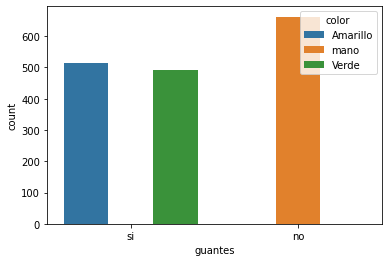

In [7]:
sns.countplot(data=tabla_0, x='guantes', hue='color')

Proporción de datos en cada clase:

In [8]:
guantes_mano=tabla_0[(tabla_0.color=='mano')]
guantes_verde=tabla_0[tabla_0.color=='Verde']
guantes_amarillo=tabla_0[tabla_0.color=='Amarillo']

In [9]:
proporcion_gsi=len(tabla_0[tabla_0.guantes=='si'])/len(tabla_0)*100
proporcion_gno=len(tabla_0[tabla_0.guantes=='no'])/len(tabla_0)*100

In [10]:
proporcion_gam=len(guantes_amarillo)/len(tabla_0)*100
proporcion_gver=len(guantes_verde)/len(tabla_0)*100
proporcion_gman=len(guantes_mano)/len(tabla_0)*100

In [11]:
proporcion_cam=len(guantes_amarillo)/len(tabla_0[tabla_0.guantes=='si'])*100
proporcion_cver=len(guantes_verde)/len(tabla_0[tabla_0.guantes=='si'])*100

In [12]:
print ( "Proporciones de nuestros datos en las clases: \n ")
print ('Proporciones de manos sin guantes' ,"  %", proporcion_gno,"\n ",
       'Proporciones de manos con guantes' ,"   %", proporcion_gsi,"\n ",
       'Proporciones de manos con guantes verdes' ,"   %", proporcion_gver,"\n ",
       'Proporciones de manos con guantes amarillos' ,"   %", proporcion_gam,"\n ",
       'Proporciones de manos con guantes color mano' ,"   %", proporcion_gman,"\n ",
       'Proporciones de manos con guantes verdes con respecto a amarillo' ,"   %", proporcion_cver,"\n ",
       'Proporciones de manos con guantes amarillos con respecto a verdes' ,"   %", proporcion_cam,"\n ",
          )

Proporciones de nuestros datos en las clases: 
 
Proporciones de manos sin guantes   % 39.68824940047961 
  Proporciones de manos con guantes    % 60.31175059952039 
  Proporciones de manos con guantes verdes    % 29.496402877697843 
  Proporciones de manos con guantes amarillos    % 30.815347721822544 
  Proporciones de manos con guantes color mano    % 39.68824940047961 
  Proporciones de manos con guantes verdes con respecto a amarillo    % 48.9065606361829 
  Proporciones de manos con guantes amarillos con respecto a verdes    % 51.0934393638171 
 


In [13]:
tabla_0_pequeño=tabla_0[tabla_0.Size=='P']
tabla_0_grande=tabla_0[tabla_0.Size=='G']

## Regresión Lineal

*a) Hacer una gráfica que muestre su relación con la variable objetivo. Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado. Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.*

**Elección de atributos:** Recordando la notebook anterior, pudimos observar cuáles features se correlacionaban más con los valores de las coordenadas mínimas de nuestros objetos. Visualizamos esta relación para ver cuál feature o atributo es mejor para realizar una instancia de regresión lineal.

In [14]:
features_maxcorr_xmin=['1936', '523', '990', '2013', '858']

In [15]:
features_columns=[tabla_0.columns[13:]]

Realizamos una elección de nuestros features para ver cuál elegir para el entrenamiento:

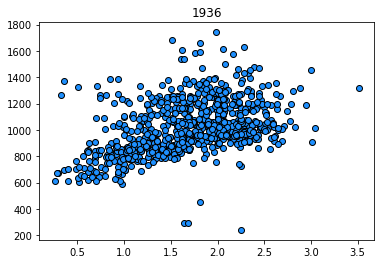

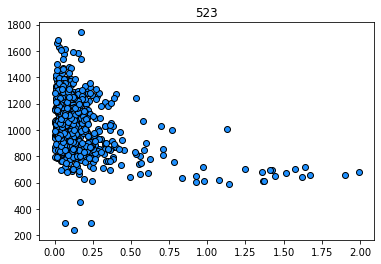

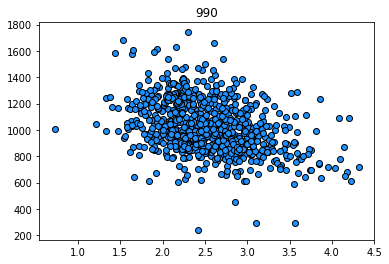

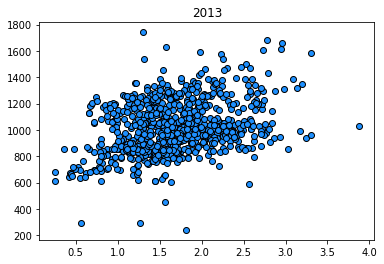

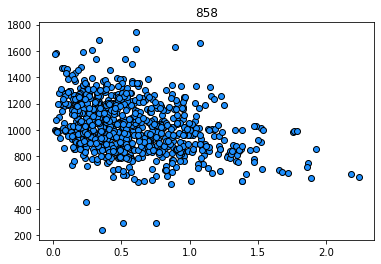

In [16]:
for i in features_maxcorr_xmin:

 plt.scatter(tabla_0_pequeño[i],tabla_0_pequeño['xmin'], facecolor="dodgerblue", edgecolor="k", label="datos")
 plt.title(i)
 plt.show()

El primero parece tener mayor linealidad. Comenzamos a arreglar los datos.

*** ver de normalizar el xmin!!!!*** ***regularización????aqui?? en el de las variables??***

In [17]:
X, y = np.array(tabla_0_pequeño['1936']), np.array(tabla_0_pequeño['xmin'])

In [18]:
X_train, X_test, y_train, y_test=train_test_split( X, y, train_size=0.80, random_state=0)

In [19]:
(X_train.reshape(-1,1)).shape, (y_train.reshape(-1,1)).shape

((636, 1), (636, 1))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [21]:
degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

In [23]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train.reshape(-1,1), y_train_pred)
test_error = mean_squared_error(y_test.reshape(-1,1), y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 3.3e+04
Error en prueba: 3e+04


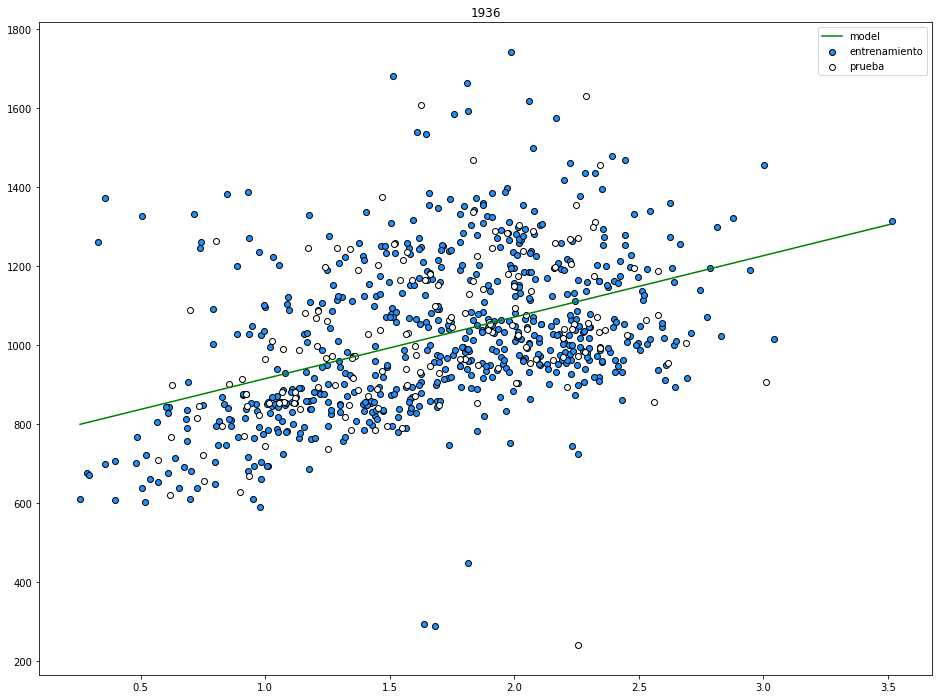

In [24]:
x_start = min(np.min(X_train.reshape(-1,1)), np.min(X_test.reshape(-1,1)))
x_end = max(np.max(X_train.reshape(-1,1)), np.max(X_test.reshape(-1,1)))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(16,12))
plt.plot(x, model.predict(x), color="green", label="model")

plt.scatter(X_train.reshape(-1,1), y_train.reshape(-1,1), facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test.reshape(-1,1), y_test, facecolor="white", edgecolor="k", label="prueba")
plt.title(features_maxcorr_xmin[0])
plt.legend()
plt.show()

Se puede ver que el feature 1936 se relaciona directamente lineal con la coordenada de X mínima del objeto con un error cuadrático bastante amplio (33000), el cual es el mismo tanto para los conjuntos de entrenamiento como para los de prueba. Se puede apreciar que hay algunos puntos que se encuentran muy lejanos a la misma, y que la recta se podría ajustar mejor con una mayor inclinación. 

*b) Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones.*

Veamos cuáles pares tienen mayor linealidad:

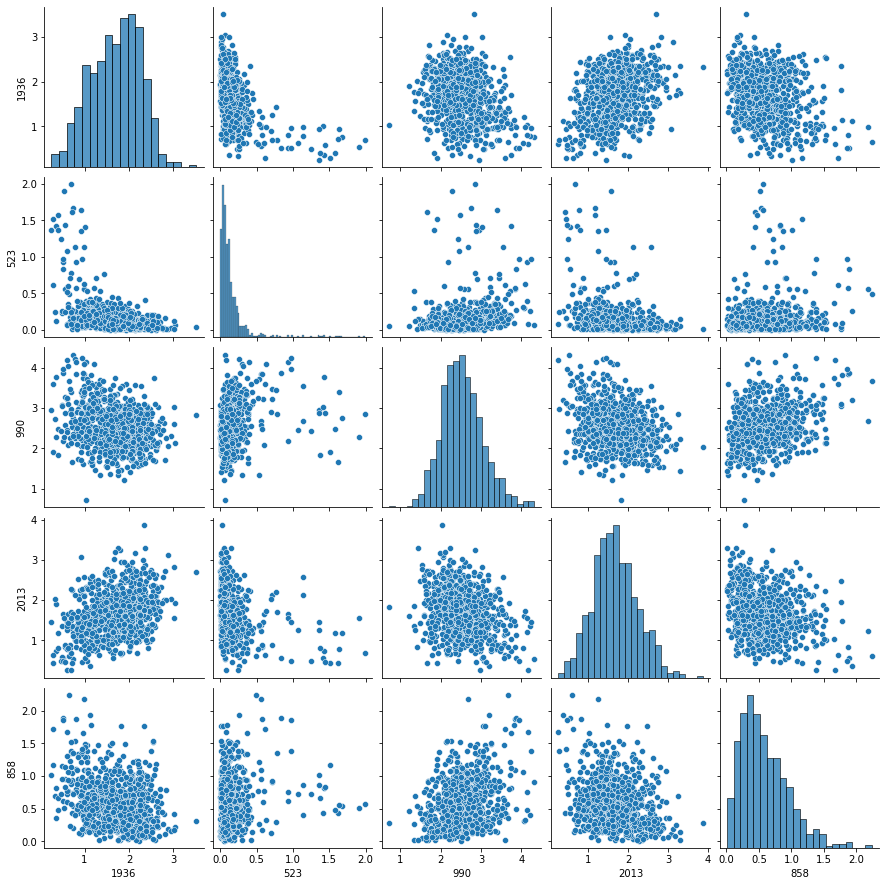

In [25]:
sns.pairplot(data=tabla_0_pequeño, vars=features_maxcorr_xmin)

2013 y 1936 parecen tener una mayor linealidad que el resto de las gráficas.

In [26]:
X_f, y_f = np.array(tabla_0_pequeño['2013']), np.array(tabla_0_pequeño['1936'])

In [27]:
X_train_f, X_test_f, y_train_f, y_test_f=train_test_split( X_f.reshape(-1,1), y_f.reshape(-1,1), train_size=0.80, random_state=0)

In [28]:
degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train_f)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [29]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [30]:
train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.26
Error en prueba: 0.24


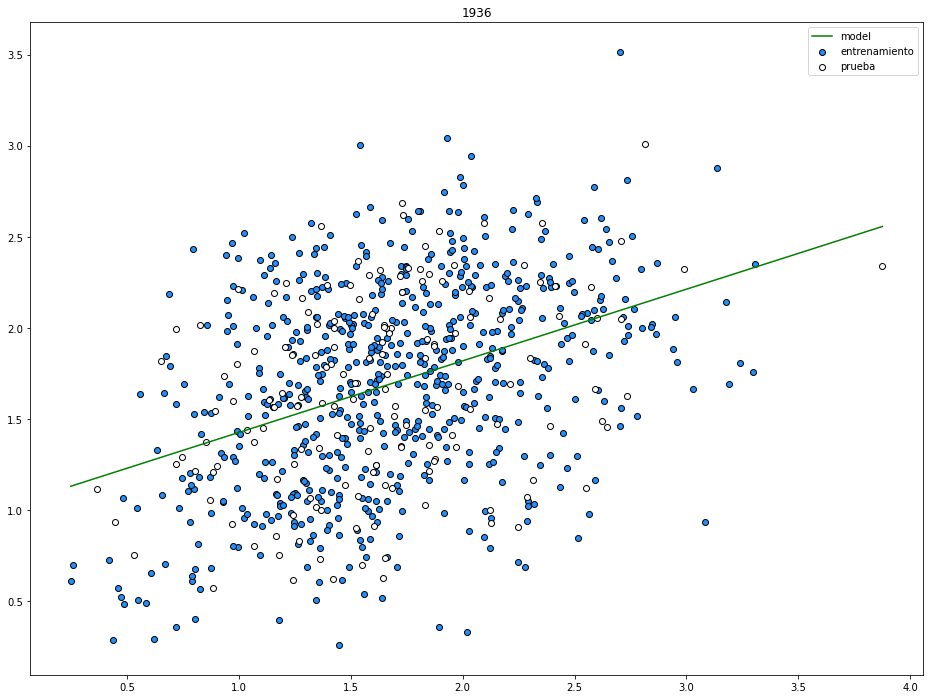

In [31]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(16,12))
plt.plot(x, model.predict(x), color="green", label="model")

plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")
plt.title(features_maxcorr_xmin[0])
plt.legend()
plt.show()

Ahora hacemos para varios grados:

In [32]:
train_errors = []
test_errors = []
sum_errors = []
degrees = [0, 1, 2, 3, 4, 5,6,7]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train_f)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train_f, y_train_pred)
    test_error = mean_squared_error(y_test_f, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    sum_errors.append(train_error + test_error)

    print(f'Con grado {degree} en entrenamiento error: {train_error:0.2}, prueba: {test_error:0.2}, suma: {test_error+train_error:0.2}')

Con grado 0 en entrenamiento error: 0.31, prueba: 0.28, suma: 0.59
Con grado 1 en entrenamiento error: 0.26, prueba: 0.24, suma: 0.51
Con grado 2 en entrenamiento error: 0.26, prueba: 0.25, suma: 0.51
Con grado 3 en entrenamiento error: 0.26, prueba: 0.25, suma: 0.5
Con grado 4 en entrenamiento error: 0.26, prueba: 0.26, suma: 0.52
Con grado 5 en entrenamiento error: 0.26, prueba: 0.25, suma: 0.51
Con grado 6 en entrenamiento error: 0.26, prueba: 0.25, suma: 0.51
Con grado 7 en entrenamiento error: 0.26, prueba: 1.4, suma: 1.6


Graficamos las curvas de error:

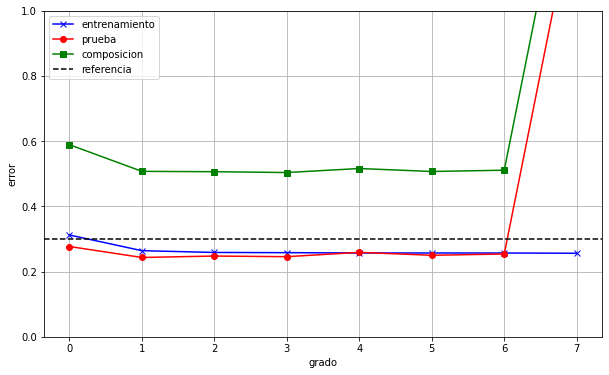

In [33]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, '-x', color="blue", label="entrenamiento")
plt.plot(degrees, test_errors, '-o', color="red", label="prueba")
plt.plot(degrees, sum_errors, '-s', color="g", label="composicion")
plt.axhline(0.3, ls = '--', color = 'black', label="referencia")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.ylim([0,1])
plt.grid(True)
plt.show()

El error de prueba es menor que el de entrenamiento hasta el grado 6, a pesar del cual el error en prueba comienza a crecer abruptamente, cuya causa posible puede ser un overfitting. El menor error en el conjunto de test ocurre en el grado 1, sin embargo también nos interesa el polinomio de grado 3 puesto que en ese lugar la suma acumulada de los errores es la menor y tiene un error en los datos de prueba bastante pequeño también.

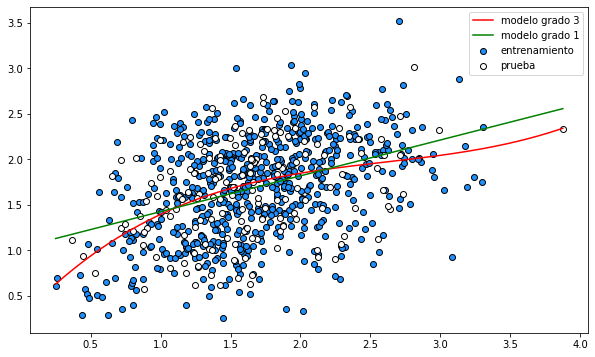

In [34]:
# train:
degree4 = 3
model4 = make_pipeline(PolynomialFeatures(degree4), LinearRegression())
model4.fit(X_train_f, y_train_f)

degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train_f)

# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

#graph
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.plot(x, model4.predict(x), color="red", label="modelo grado 3")
plt.plot(x, model.predict(x), color="green", label="modelo grado 1")

plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")
#plt.title(feature)
plt.legend()
plt.show()

*c) Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste. d) Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.*

Creamos nuestra grilla de parámetros:

In [35]:
param_grid = {
    'polynomialfeatures__degree': np.arange(5), 'linearregression__fit_intercept': [True, False],
                  'linearregression__normalize': [True, False]
          }

Los cuales son:

fit_intercept : bool, optional, default True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

normalize : bool, optional, default False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.

If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
        an estimator with ``normalize=False``.


Procedemos a realizar la búsqueda de parámetros:

In [36]:
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(), LinearRegression())

cv = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3)
cv.fit(X_train_f, y_train_f);

In [37]:
results = cv.cv_results_

In [38]:
df = pd.DataFrame(results)
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linearregression__fit_intercept,param_linearregression__normalize,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001534,0.000152,0.000905,0.000285,True,True,0,"{'linearregression__fit_intercept': True, 'lin...",-0.296292,-0.347659,-0.294687,-0.312879,0.024602,17
1,0.001505,0.000051,0.000932,0.000322,True,True,1,"{'linearregression__fit_intercept': True, 'lin...",-0.243781,-0.286239,-0.269611,-0.266544,0.017468,14
2,0.000909,0.000039,0.000410,0.000005,True,True,2,"{'linearregression__fit_intercept': True, 'lin...",-0.237432,-0.283503,-0.262655,-0.261197,0.018837,1


In [39]:
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("degree.\tfit\tnorm\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['polynomialfeatures__degree']}\t{p['linearregression__fit_intercept']}\t{p['linearregression__normalize']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

degree.	fit	norm	| mean	std	rank
0	True	True	| -0.31	0.02	17
1	True	True	| -0.27	0.02	14
2	True	True	| -0.26	0.02	1
3	True	True	| -0.26	0.02	9
4	True	True	| -0.26	0.02	5
0	True	False	| -0.31	0.02	17
1	True	False	| -0.27	0.02	13
2	True	False	| -0.26	0.02	1
3	True	False	| -0.26	0.02	10
4	True	False	| -0.26	0.02	6
0	False	True	| -0.31	0.02	19
1	False	True	| -0.27	0.02	15
2	False	True	| -0.26	0.02	3
3	False	True	| -0.26	0.02	11
4	False	True	| -0.26	0.02	7
0	False	False	| -0.31	0.02	19
1	False	False	| -0.27	0.02	15
2	False	False	| -0.26	0.02	3
3	False	False	| -0.26	0.02	11
4	False	False	| -0.26	0.02	7


El pilinomio de grado 2 parece tener mejor rankeo, y es el que menor RMSE promedio tiene.

In [40]:
best_model = cv.best_estimator_

In [41]:
y_best=best_model.predict(X_test_f)
y_train_best=best_model.predict(X_train_f)

In [42]:
train_error = mean_squared_error(y_train_f, y_train_best)
test_error = mean_squared_error(y_test_f, y_best)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.26
Error en prueba: 0.25


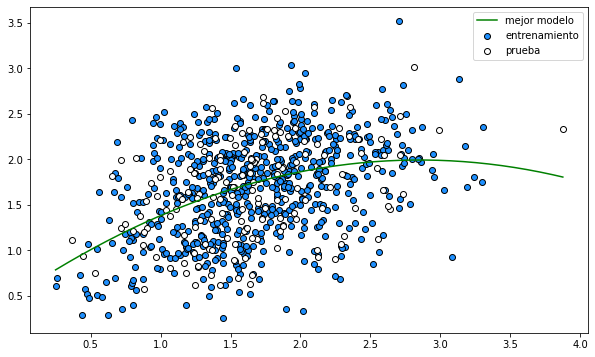

In [43]:
#graph
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.plot(x, best_model.predict(x), color="green", label="mejor modelo")

plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")

plt.legend()
plt.show()

Podemos ver que nuestro mejor modelo es hiperparabólico y se adapta a los lugares de mayor concentración de los datos que a los lugares donde hay más dispersión. Esto se puede apreciar en el valor 3 de la variable regresora.

## Clasificadores

*Clasificación: De a pares de características, implementar los algoritmos de Perceptrón, SGD y Árboles de Decisión en el conjunto Train para clasificación binaria: guantes si - guantes no (algoritmos del paquete sklearn). Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco.*

*Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros.*

In [44]:
codificado_pequeño=tabla_0_pequeño.copy()
codificado_pequeño['guantes']=preprocessing.LabelEncoder() .fit_transform(tabla_0_pequeño['guantes'])
codificado_pequeño['color']=preprocessing.LabelEncoder() .fit_transform(tabla_0_pequeño['color'])
codificado_pequeño.head()

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
81,M_P_Mostrando_Amarillos_0_single_box.jpg,888,958,246,297,M,P,train,70,51,3570,1,0,0.145595,0.213514,0.791483,0.072909,0.097112,0.352617,0.259018,1.360401,0.550221,0.154716,0.021366,0.024072,0.949577,0.064469,0.284966,0.055286,0.345928,0.326021,0.793031,0.021018,0.026289,0.323501,0.217253,0.247845,0.000000,0.101313,0.169508,...,0.025705,0.417304,0.033816,0.173230,0.051771,1.415602,0.337321,0.975691,0.550020,0.641819,0.439040,0.029718,0.301447,0.116038,0.839936,0.124410,0.249364,0.014110,0.516542,0.389848,0.184664,0.209011,0.055636,0.754151,0.081306,0.112539,0.030242,0.100436,0.059771,0.097028,0.224595,0.477608,0.254312,0.466399,0.530521,1.133145,0.532193,0.372313,0.255801,0.007732
82,M_P_Mostrando_Amarillos_100_double_box1.jpg,1039,1126,152,213,M,P,train,87,61,5307,1,0,0.633379,0.302466,1.012172,0.099294,0.621903,0.316363,0.465347,0.853991,0.348377,0.533595,0.074831,0.039681,0.317442,0.000000,0.289752,0.113386,0.212390,0.039103,0.018105,0.190704,0.073810,0.538579,0.840063,0.128677,0.630762,0.083598,0.126321,...,0.493111,0.462204,0.077777,0.009331,0.571931,2.391589,0.827531,0.060029,0.321658,0.492403,1.175636,0.055608,0.406178,0.415775,1.158667,0.006724,0.033182,0.024130,1.273448,0.427369,0.344070,0.243982,0.014488,2.060503,0.372567,0.062778,0.772663,0.630821,0.237646,0.604410,0.252473,0.293842,0.053953,0.081763,1.139570,0.293480,0.567158,0.168934,2.355879,0.037785
83,M_P_Mostrando_Amarillos_100_double_box2.jpg,871,943,215,269,M,P,train,72,54,3888,1,0,0.319083,0.094527,1.127734,0.534825,0.190210,0.021705,0.687998,0.856857,0.183420,0.474442,0.044079,0.185068,0.509284,0.026576,0.106728,0.060262,0.263037,0.507972,0.818271,0.021119,0.121881,0.278807,0.396050,0.198627,0.027860,0.000000,0.164530,...,0.068353,0.626280,0.000000,0.245522,0.234813,1.132762,0.057690,0.483179,0.777851,0.194896,0.506794,0.051573,0.175273,0.012522,1.179126,0.221046,0.641441,0.569595,0.262994,0.444106,0.629760,0.600889,0.173166,0.754283,0.377667,0.170891,0.124353,0.112478,0.061948,0.029943,0.440217,0.215177,0.495561,0.172839,1.033710,0.106296,0.377070,0.361771,0.199704,0.013590
84,M_P_Mostrando_Amarillos_10_single_box.jpg,786,825,224,273,M,P,train,39,49,1911,1,0,0.197739,0.013961,1.408641,0.175166,0.251813,0.085982,0.406800,0.667196,0.542266,0.132715,0.000000,0.032831,0.417020,0.230002,0.000000,0.000584,0.261363,0.801301,0.385944,0.031844,0.017942,0.065300,0.523358,0.217141,0.044985,0.076430,0.057129,...,0.033693,0.492676,0.000000,0.051219,0.356656,1.458888,0.044209,0.205244,0.200680,0.208520,0.907671,0.103609,0.245072,0.174300,0.657183,0.002458,0.407922,0.657996,0.136228,0.116019,0.498531,0.257284,0.132322,1.231766,0.148895,0.103609,0.109232,0.008206,0.053224,0.049139,0.372761,0.751837,0.160556,0.253747,1.859141,0.049466,0.700408,0.082716,0.077863,0.000677
85,M_P_Mostrando_Amarillos_110_double_box1.jpg,988,1050,244,296,M,P,train,62,52,3224,1,0,0.016625,0.319181,0.699352,0.021068,0.072414,0.142063,0.261854,0.670813,1.015223,0.124863,0.035095,0.053907,0.508308,0.421238,0.062072,0.022632,0.470993,0.070397,0.024676,0.193389,0.057658,0.138698,0.183891,0.122445,0.048152,0.232768,0.446347,...,0.016805,0.072712,0.009410,0.454008,0.222385,2.464293,1.135042,0.233880,0.034567,1.043756,0.357322,0.185957,0.069455,0.043992,0.446661,0.406829,0.407048,0.133187,0.292348,0.298762,0.136744,0.216321,0.556162,0.838409,0.473377,0.080431,0.331338,0.076842,0.281634,0.102907,0.399727,0.210005,0.161583,0.100478,0.663306,0.393639,0.682728,0.113168,0.041992,0.000000


Los features que se encontraban más correlacionados con nuestras categorías eran:

In [45]:
features_guantes=['518', '1563']

In [46]:
#Variables de interés: etiquetas: codificado_pequeño['guantes'], X_train=feature_guantes
codificado_pequeño[features_guantes]

,518,1563
81,0.496787,0.774287
82,1.079900,0.568232
83,1.237995,1.301334
84,1.009581,0.879101
85,0.362154,0.168703
...,...,...
1663,0.784744,0.380032
1664,0.021945,0.353489
1665,0.852391,0.275772
1666,0.544776,0.516550


Vectorizamos nuestras variables:

In [47]:
codificado_array=np.array(codificado_pequeño[features_guantes])

In [48]:
codificado_array.shape

(796, 2)

In [49]:
array_guantes=np.array(codificado_pequeño['guantes'])

In [50]:
array_guantes_vect=array_guantes.reshape(-1,1)

In [51]:
array_guantes_vect.shape

(796, 1)

In [52]:
X, y=codificado_array, array_guantes

Separación de nuestros datos:

In [53]:
X_train, X_test, y_train, y_test=train_test_split( X, y, train_size=0.80, random_state=0)

Graficamos nuestro conjunto de datos

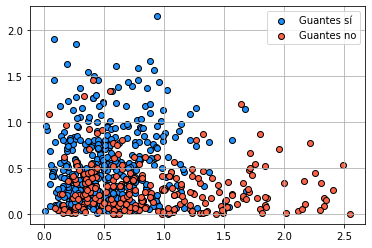

In [54]:
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.grid()
plt.legend()
plt.show()

A simple vista podemos ver que nuestros datos no son linealmente separables, por lo tanto una clasificación que consista únicamente de una recta no sería propicio para nuestros datos.

#Perceptrón

Realizamos la primer predicción con un modelo de perceptrón sin modificar sus hiperparámetros más que su "random state"

In [55]:
from sklearn.linear_model import Perceptron

In [56]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
clf.score(X_test, y_test)

0.50625

In [58]:
clf.score(X_train, y_train)

0.5283018867924528

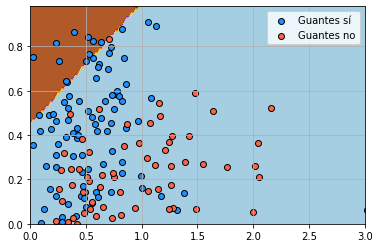

In [59]:
#x_start = min(np.min(X_train), np.min(X_test))
#x_end = max(np.max(X_train), np.max(X_test))
#x = np.linspace(x_start, x_end, 200).reshape(-1, 2)

x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x,clf.decision_function(x), color="green", label="primer perceptron")
plt.grid()
plt.legend()
plt.show()

Se puede observar que nuestro bias es negativo, y que hay un accuracy del %50 para nuestros datos de prueba.

#Perceptrón GridSearchCV

Ahora probamos cambiando los hiperparámetros haciendo una búsqueda de los mejores con GridShearchCV.

In [60]:
params_perceptron={'alpha': [0,0.03,0.08,0.3,0.5], 'early_stopping': [False, True], 'eta0': [0.03,0.08,0.3,0.5,0.8,1,2,3,4,5,6],
                   'fit_intercept':[True, False],
           'penalty':[ 'l2', 'l1', 'elasticnet'],
            }

In [61]:

cv = GridSearchCV(clf, params_perceptron, scoring='accuracy', cv=5)
cv.fit(X_train,y_train);

In [62]:
result_perceptron=cv.cv_results_
rtdos_perceptron=pd.DataFrame(result_perceptron)
rtdos_perceptron.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_early_stopping,param_eta0,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001221,0.000495,0.000341,0.000064,0,False,0.03,True,l2,"{'alpha': 0, 'early_stopping': False, 'eta0': ...",0.625000,0.755906,0.551181,0.748031,0.629921,0.662008,0.078611,125
1,0.000949,0.000032,0.000295,0.000017,0,False,0.03,True,l1,"{'alpha': 0, 'early_stopping': False, 'eta0': ...",0.625000,0.755906,0.551181,0.748031,0.629921,0.662008,0.078611,125
2,0.000949,0.000014,0.000294,0.000014,0,False,0.03,True,elasticnet,"{'alpha': 0, 'early_stopping': False, 'eta0': ...",0.625000,0.755906,0.551181,0.748031,0.629921,0.662008,0.078611,125
3,0.000905,0.000016,0.000286,0.000005,0,False,0.03,False,l2,"{'alpha': 0, 'early_stopping': False, 'eta0': ...",0.671875,0.716535,0.598425,0.732283,0.622047,0.668233,0.051875,114
4,0.000952,0.000019,0.000288,0.000007,0,False,0.03,False,l1,"{'alpha': 0, 'early_stopping': False, 'eta0': ...",0.671875,0.716535,0.598425,0.732283,0.622047,0.668233,0.051875,114


In [63]:
mejor_perceptron=cv.best_estimator_

In [64]:
mejor_perceptron.fit(X_train, y_train)

Perceptron(alpha=0.03, class_weight=None, early_stopping=True, eta0=0.3,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
mejor_perceptron.score(X_test, y_test)

0.76875

In [66]:
mejor_perceptron.score(X_train, y_train)

0.7358490566037735

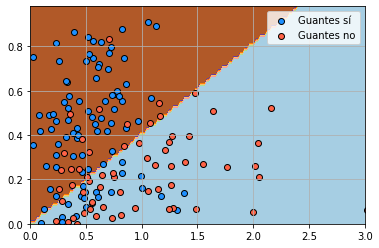

In [67]:
#x_start = min(np.min(X_train), np.min(X_test))
#x_end = max(np.max(X_train), np.max(X_test))
#x = np.linspace(x_start, x_end, 200).reshape(-1, 2)

x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = mejor_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x, mejor_perceptron.decision_function(x), color="green", label="mejor perceptron")
plt.grid()
plt.legend()
plt.show()

Nuestro modelo mejoró mucho, ahora el accuracy de los datos de prueba subieron a un 76%, probando con más opciones de nuestros hiperparámetros no se puede mejorar más el modelo. Sin embargo queda la duda de cuál sería su mejor combinación posible. 

#SGD Classifier

In [68]:
#Datos: array_guantes_vect, codificado_array (guantes, features)

In [69]:
#Gradiente descendente
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
GD= make_pipeline(StandardScaler(), SGDClassifier(random_state=0))

In [70]:
GD.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=0,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)>

In [71]:
#Entrenamiento
GD.fit(X_train, y_train)

#Predicción
y_train_pred_GD = GD.predict(X_train)
y_test_pred_GD  = GD.predict(X_test)

In [72]:
GD.score(X_train, y_train)

0.7044025157232704

In [73]:
GD.score(X_test, y_test)

0.775

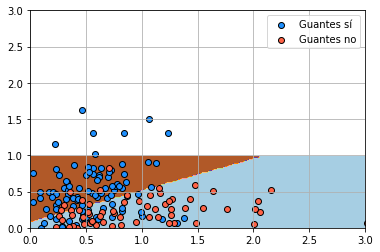

In [74]:
#Gráficamente.., para el conjunto de test..
#x_start = min(np.min(X_train), np.min(X_test))
#x_end = max(np.max(X_train), np.max(X_test))
#x = np.linspace(x_start, x_end, 200).reshape(-1, 2)

x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = GD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")



#plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
#plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x, GD.decision_function(x), color="green", label="Gradiente descendente")

plt.grid()
plt.ylim([0,3])
plt.legend()
plt.show()

In [75]:
param_sgd={'sgdclassifier__learning_rate':['optimal'], 
           'sgdclassifier__loss':['perceptron', 'log', 'hinge'],
           'sgdclassifier__penalty':['l1', 'l2', 'elasticnet'], 
           'sgdclassifier__l1_ratio': np.linspace(0, 1, 13),
           'sgdclassifier__alpha': np.logspace(-5, 0, 9),
           'sgdclassifier__eta0':[0]}

In [76]:
GSCV = GridSearchCV(GD, param_sgd, cv=5, scoring='accuracy') 
GSCV.fit(X_train, y_train);

In [77]:
result_SGD=GSCV.cv_results_
rtdos_SGD=pd.DataFrame(result_SGD)
rtdos_SGD.sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgdclassifier__alpha,param_sgdclassifier__eta0,param_sgdclassifier__l1_ratio,param_sgdclassifier__learning_rate,param_sgdclassifier__loss,param_sgdclassifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
552,0.002868,0.000242,0.000447,0.000015,0.00316228,0,0.75,optimal,log,l1,{'sgdclassifier__alpha': 0.0031622776601683794...,0.6875,0.716535,0.771654,0.795276,0.80315,0.754823,0.045285,1
536,0.002770,0.000205,0.000409,0.000023,0.00316228,0,0.583333,optimal,log,elasticnet,{'sgdclassifier__alpha': 0.0031622776601683794...,0.6875,0.716535,0.771654,0.795276,0.80315,0.754823,0.045285,1
570,0.002683,0.000219,0.000408,0.000020,0.00316228,0,0.916667,optimal,log,l1,{'sgdclassifier__alpha': 0.0031622776601683794...,0.6875,0.716535,0.771654,0.795276,0.80315,0.754823,0.045285,1


In [78]:
mejor_SGD=GSCV.best_estimator_

In [79]:
mejor_SGD.score(X_train, y_train)

0.7515723270440252

In [80]:
mejor_SGD.score(X_test, y_test)

0.8

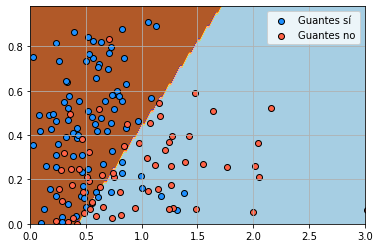

In [81]:
#Gráficamente.., para el conjunto de test..
#x_start = min(np.min(X_train), np.min(X_test))
#x_end = max(np.max(X_train), np.max(X_test))
#x = np.linspace(x_start, x_end, 200).reshape(-1, 2)

x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = mejor_SGD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


#plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
#plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x,mejor_SGD.decision_function(x), color="green", label="Gradiente descendente")

plt.grid()
#plt.ylim([0,3])
plt.legend()
plt.show()

# Arbol de desiciones

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf =  make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=0,
                                        splitter='best'))],
         verbose=False)

In [83]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [84]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.7


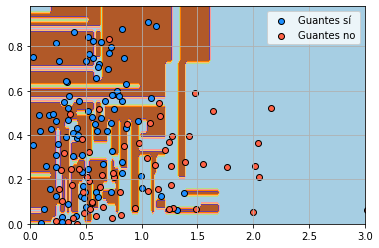

In [85]:
#Para test..
x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


#plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
#plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x, clf.predict(x), color="green", label="Arbol de decisiones")

plt.grid()
#plt.ylim([0,3])
plt.legend()
plt.show()

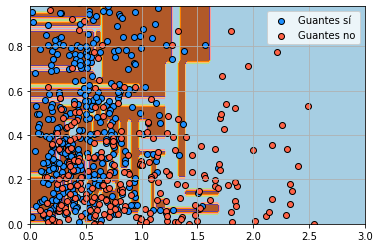

In [86]:
#Para train..
x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")


plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
#plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x, clf.predict(x), color="green", label="Arbol de decisiones")

plt.grid()
#plt.ylim([0,3])
plt.legend()
plt.show()

In [87]:
print('Profundidad máxima:', clf[1].get_depth())
print('Cantida de hojas  :', clf[1].get_n_leaves())

Profundidad máxima: 26
Cantida de hojas  : 185


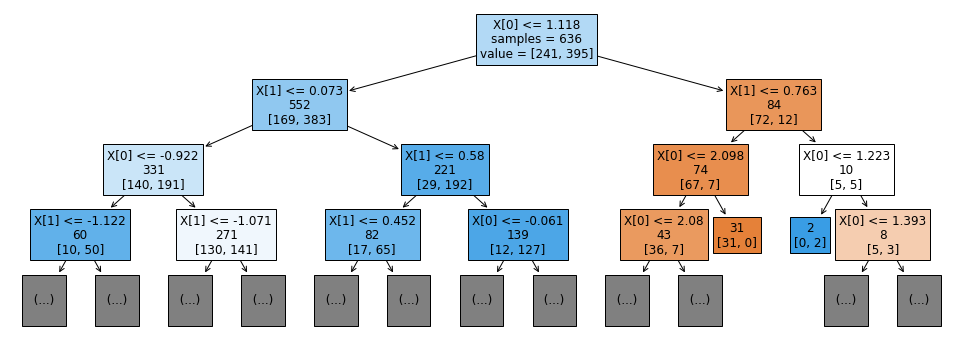

In [88]:
from sklearn.tree import plot_tree
plt.figure(figsize=(17,6))
plot_tree(clf[1], impurity=False, filled=True, max_depth=3, fontsize=12, label='root')
plt.show()

Podemos ver que el modelo separa en más de dos clases.

In [89]:
#Ahora con gridSearchCV
param_arbol = {
          'decisiontreeclassifier__criterion': ['gini', 'entropy'],
          #'decisiontreeclassifier__splitter':['best','random'],
          'decisiontreeclassifier__max_depth': np.arange(1,10),
          'decisiontreeclassifier__min_samples_split': np.arange(2,10),
          'decisiontreeclassifier__min_samples_leaf': np.arange(1,6),
          'decisiontreeclassifier__max_leaf_nodes': np.arange(1,6),
          'decisiontreeclassifier__min_impurity_decrease': np.linspace(0,1,10)
         # 'decisiontreeclassifier__ccp_alpha': np.linspace(0,1,10),
          }

  


In [90]:
clf_par = GridSearchCV(clf, param_arbol, cv=5, refit='accuracy', scoring=['accuracy'], n_jobs=-1) 
clf_par.fit(X_train, y_train);

In [91]:
result_arbol=clf_par.cv_results_
rtdos_arbol=pd.DataFrame(result_arbol)
rtdos_arbol.sort_values(by='rank_test_accuracy').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__max_leaf_nodes,param_decisiontreeclassifier__min_impurity_decrease,param_decisiontreeclassifier__min_samples_leaf,param_decisiontreeclassifier__min_samples_split,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
30821,0.002863,0.000056,0.000577,0.000007,entropy,7,3,0,3,7,{'decisiontreeclassifier__criterion': 'entropy...,0.710938,0.669291,0.677165,0.76378,0.740157,0.712266,0.036089,1
24818,0.002951,0.000096,0.000628,0.000044,entropy,4,3,0,3,4,{'decisiontreeclassifier__criterion': 'entropy...,0.710938,0.669291,0.677165,0.76378,0.740157,0.712266,0.036089,1
24817,0.003004,0.000095,0.000625,0.000046,entropy,4,3,0,3,3,{'decisiontreeclassifier__criterion': 'entropy...,0.710938,0.669291,0.677165,0.76378,0.740157,0.712266,0.036089,1


In [92]:
mejor_arbol=clf_par.best_estimator_

In [93]:
mejor_arbol.score(X_train, y_train)

0.7154088050314465

In [94]:
mejor_arbol.score(X_test, y_test)

0.70625

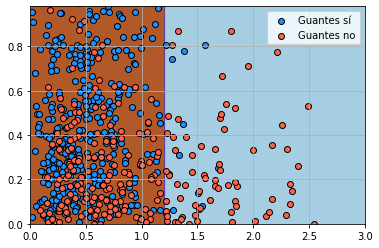

In [95]:
#Para train..
x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = mejor_arbol.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
#x = np.linspace(x_start, x_end, 200).reshape(-1, 2)


plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
#plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x, clf_par.predict(x), color="green", label="Arbol de decisiones")

plt.grid()
#plt.ylim([0,3])
plt.legend()
plt.show()

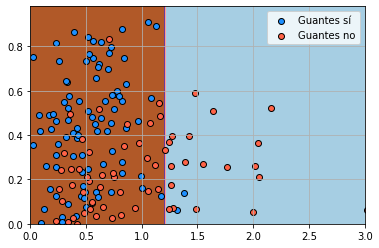

In [96]:
#Para test..
x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
y_start = min(np.min(y_train), np.min(y_test))
y_end = max(np.max(y_train), np.max(y_test))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = mejor_arbol.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
#x = np.linspace(x_start, x_end, 200).reshape(-1, 2)


#plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
#plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
#plt.plot(x, clf_par.predict(x), color="green", label="Arbol de decisiones")

plt.grid()
#plt.ylim([0,3])
plt.legend()
plt.show()

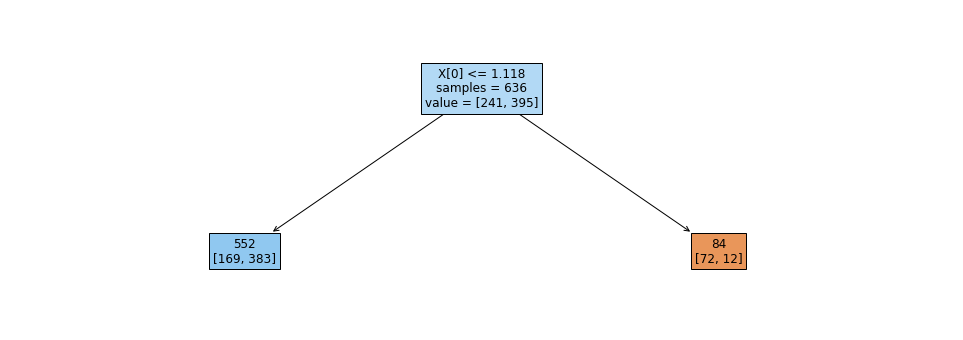

In [97]:
plt.figure(figsize=(17,6))
plot_tree(mejor_arbol[1], impurity=False, filled=True, fontsize=12, label='root')
plt.show()

Las clases están un poco desbalanceadas

In [98]:
mejor_arbol.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=1, max_features=None, max_leaf_nodes=2,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 1,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': 2,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_impurity_split': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decision

Podemos ver que el sobreajuste disminuyó y ahora el modelo separa en dos clases.

A simple vista podríamos decir que las variables que se eligieron pudieron haber sido otras en las que haya una mayor separación con respecto a si hay guantes o no.. tal vez buscando aquellos features donde haya una mayor separabilidad entre los datos y se correspondan con la distinción de si hay guantes o no. La correlación se hizo sobre una etiqueta y no sobre una verdadera exploración. Otra cosa que podríamos mejorar sería la presentación de los datos, tal vez si los presentamos de otra manera, por ejemplo como distribuciones gaussianas o normalizadas, se podría apreciar mejor la separabilidad de los datos.

In [ ]:
#revisar el plot del desicion boundary

In [ ]:
#Conjunto grande:

In [ ]:
codificado_grande=tabla_0_grande.copy()
codificado_grande['guantes']=preprocessing.LabelEncoder() .fit_transform(tabla_0_grande['guantes'])
codificado_grande['color']=preprocessing.LabelEncoder() .fit_transform(tabla_0_grande['color'])
codificado_grande.head()

In [ ]:
codificado_grande=codificado_grande.drop(codificado_grande.columns[0:11], axis=1)
codificado_grande.head()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(codificado_grande[codificado_grande.columns[2:]], codificado_grande[codificado_grande.columns[1]], train_size=0.20, random_state=0)